
This model analyzes the influence of the growth of the variety of marketed products 
and the number of clients served in the Company Billing. 
Does one of them contribute, in the billing, more than the other? 
what could be a better policy, more customers or more products?
    


It will be processed a set of 7000 invoice issued between 2014 and 2018
Each invoice has :
CustomerName
CustomeCode
Date
CustomerAdres
ProductCod, ProductName, UnitOfMeasurement
Price
        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
import math
#%matplotlib inline
#%matplotlib notebook

In [2]:
df = pd.read_csv('C:/Mettricx/Projetos/SFoods/DataSet/NFe-SupraS.csv', dtype={'cod': object, 'NF': object, 'CNPJ': object})

In [3]:
df.head()

,cliente,NF,data,CNPJ,cidade,bairro,UF,cod,QTY,preco,descricao,Familia,unidade
0,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,4,2014-08-29,27833615002018,RIO DE JANEIRO,CASIMIRO DE ABREU,RJ,020002,1,2.77,ALHO E CEBOLA PICADINHO S/SAL 180GR,Temperos,UN
1,TOP GREEN FRUIT HORTIFRUITGRANJEIROS LTDA,1275,2014-10-04,09642314000162,ARARUAMA,CENTRO,RJ,020002,24,66.48,ALHO E CEBOLA PICADINHO S/SAL 180GR,Temperos,UN
2,M L ZIELINSKI LANCHONETE E CONVENIENCIA,1285,2014-10-09,20815576000114,MACAE,SOL E MAR,RJ,020002,2,5.54,ALHO E CEBOLA PICADINHO S/SAL 180GR,Temperos,UN
3,NOVA ESPERANCA DE ARARUAMA LTDA EPP,1294,2014-10-14,05054332000172,ARARUAMA,MATARUNA,RJ,020002,18,49.86,ALHO E CEBOLA PICADINHO S/SAL 180GR,Temperos,UN
4,SUPERMERCADO SAO JUDAS TADEU LTDA,1296,2014-10-14,09653290000147,SAQUAREMA,BACAXA,RJ,020002,12,33.24,ALHO E CEBOLA PICADINHO S/SAL 180GR,Temperos,UN


#### Number of lines in the DataSet

In [4]:
len(df)

160606

#### Sales per month

In [5]:
Vendas = df[['data','preco']].groupby(df['data'].str[0:7]).sum().reset_index()

In [6]:
Vendas = Vendas.rename(columns={'preco':'Total_Vendas'})

In [7]:
Vendas.head()

,data,Total_Vendas
0,2014-08,25.15
1,2014-09,30112.97
2,2014-10,163876.63
3,2014-11,198276.21
4,2014-12,259088.05


#### Products sold per month

In [8]:
produtos = df[['data', 'cod']] 

In [9]:
produtos['mes'] = produtos['data'].str[0:7]

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
produtos = produtos.sort_values(by=['mes','cod'],ascending=True, na_position='first').reset_index(drop=True)

In [11]:
produtos = produtos.drop('data', 1)

In [12]:
produtos = produtos.drop_duplicates().reset_index(drop=True) 

In [13]:
produtos.head()

,cod,mes
0,010001,2014-08
1,010002,2014-08
2,010006,2014-08
3,010007,2014-08
4,010009,2014-08


In [14]:
Num_Produtos = produtos[['cod']].groupby(produtos['mes']).count().reset_index(drop=False)

In [15]:
Num_Produtos = Num_Produtos.rename(columns={'cod': 'NumProdutos'})

#### Determines for each month the number of distinct products being marketed

In [16]:
Num_Produtos.head()

,mes,NumProdutos
0,2014-08,8
1,2014-09,165
2,2014-10,213
3,2014-11,221
4,2014-12,216


In [17]:
Num_Produtos['mes1'] = pd.to_datetime(Num_Produtos['mes'], format='%Y-%m'  )

Text(0,0.5,'Num Produtos')

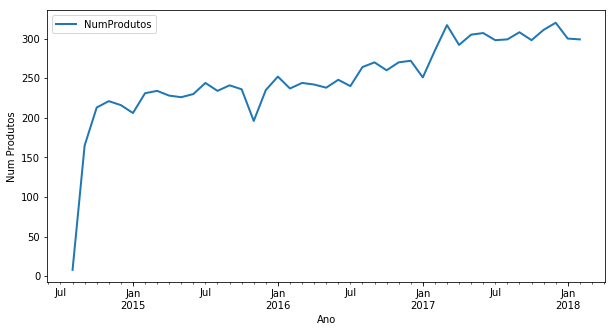

In [18]:
Num_Produtos.plot(x='mes1', y='NumProdutos',figsize=(10,5), linewidth=2, fontsize=10)
plt.xlabel('Ano', fontsize=10)
plt.ylabel('Num Produtos', fontsize=10)

#### Number of Clients Served in the Month

In [19]:
dados = df[['data', 'CNPJ']]

In [20]:
dados = dados.sort_values(by=['data','CNPJ'],ascending=True, na_position='first').reset_index(drop=True)

In [21]:
dados = dados.drop_duplicates().reset_index(drop=True)

In [22]:
Num_Cliente = dados[['CNPJ']].groupby(dados['data'].str[0:7]).count().reset_index(drop=False)


In [23]:
Num_Cliente .head()

,data,CNPJ
0,2014-08,2
1,2014-09,18
2,2014-10,91
3,2014-11,93
4,2014-12,97


In [24]:
Num_Cliente = Num_Cliente.rename({'CNPJ':'NumDeClientes'}, axis=1)

In [25]:
Supra_Kpi = pd.merge(Num_Cliente, Vendas, on = 'data')

In [26]:
Supra_Kpi = Supra_Kpi.rename(columns={'data': 'mes'})

#### Determines, for each Month, the number of different Products sold, the Number of Clients Served and the Monthly Billing

In [27]:
Kpi = pd.merge(Supra_Kpi,Num_Produtos , on = 'mes')

In [28]:
Kpi = Kpi[['mes', 'NumDeClientes','NumProdutos','Total_Vendas']] # Ordenando as colunas

In [29]:

Kpi['Total_Vendas']  = Kpi['Total_Vendas'] /1000


In [30]:
Kpi.to_csv('c:/mettricx/projetos/SupraAlimentos/PowerBI/Vendas.csv',decimal=',',float_format='%.2f',encoding='utf-8', index=False)

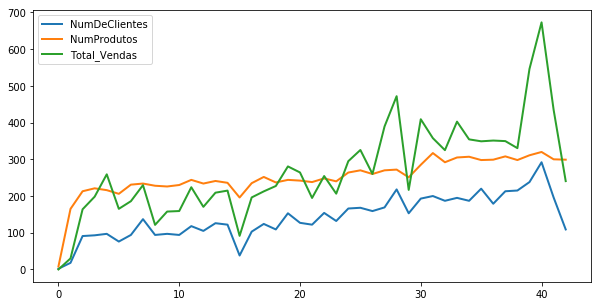

In [31]:
Kpi.plot(figsize=(10,5), linewidth=2, fontsize=10)

In [54]:
y=Kpi[['Total_Vendas']]

In [55]:
X=Kpi[['NumDeClientes','NumProdutos']]

In [34]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

####  Model: Linear regression on multiple variable

In [35]:
#  Adjusted R2 judges goodness of the model
#  Parameters:  fitted linear model, y value, estimated y value

In [36]:
def adj_r2_score(model,y,yhat):     
              
        from sklearn import metrics
        adj = 1 - float(len(y)-1)/(len(y)-len(model.coef_)-1)*(1 - metrics.r2_score(y,yhat))
        return adj

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
        

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
    
reg =  LinearRegression()
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

#### R2 - Variance score:

In [39]:
print(color.BOLD+'R2 - Variance score: %.2f'% metrics.r2_score(y_test, predictions)+color.END)
print(color.BOLD+'Adj R2 : ', adj_r2_score(reg, y_test, predictions),color.END)
print()
print(color.BOLD+'Predictions ','\t'+color.END)
i=0
for ind in predictions:
    print('%.2f'% predictions[i],'\t')
    i += 1

       

R2 - Variance score: 0.85
Adj R2 :  0.8389632989349266 

Predictions  	
6.13 	
318.65 	
368.80 	
174.75 	
463.41 	
221.19 	
179.02 	
192.04 	
160.29 	
349.08 	
290.84 	
426.29 	
316.39 	


#### Coefficients:

In [40]:
print()
print(color.BOLD+'Coefficients: '+color.END, reg.coef_)



Coefficients:  [[ 2.2635904  -0.27888964]]


#### RMSE

In [41]:
print()
print('\033[1m' +'Errors:'+'\033[0m') 
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print(color.RED+'MSE:'+color.END, metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print()


Errors:
MAE: 40.66341770429293
MSE: 2269.429637243676
RMSE: 47.63853101475397



In [42]:
import statsmodels.api as sm

In [43]:
model = sm.OLS(y,X)

In [44]:
results = model.fit()


In [45]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Vendas   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     951.4
Date:                Tue, 26 Feb 2019   Prob (F-statistic):           4.42e-35
Time:                        10:18:29   Log-Likelihood:                -222.73
No. Observations:                  43   AIC:                             449.5
Df Residuals:                      41   BIC:                             453.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
NumDeClientes     2.1315      0.183     11.663

In [103]:
print('NumDeClientes : '+str(results.params[0]))
print('NumProdutos   : '+str(results.params[1]))

NumDeClientes : 2.1314579048876854
NumProdutos   : -0.1351390420511852


In [110]:
Produto = 231

In [111]:
Clientes = 94

In [112]:
Total = 2.1314579048876854*Clientes + -0.1351390420511852*Produto

In [115]:
((185.94533 - Total)/Total)*100

9.935800621526477

#### P-Value

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). 

A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

#### Adj. R-Squared

The adjusted R-squared compares the descriptive power of regression models that include diverse numbers of predictors. 

Every predictor added to a model increases R-squared and never decreases it. 
Thus, a model with more terms may seem to have a better fit just for the fact that it has more terms, 
while the adjusted R-squared compensates for the addition of variables and only increases if the new term enhances 
the model above what would be obtained by probability and decreases when a predictor enhances the model less than what is predicted by chance. 
In an overfitting condition, an incorrectly high value of R-squared, which leads to a decreased ability to predict, is obtained. 
This is not the case with the adjusted R-squared.

In [73]:
Xcoef=Kpi[['Total_Vendas','NumDeClientes']]

C:\Users\leona\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


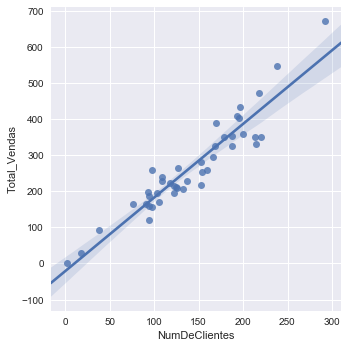

In [74]:
import seaborn as sns; sns.set(color_codes=True)
#tips = sns.load_dataset("tips")
g = sns.lmplot(x="NumDeClientes", y="Total_Vendas", data=Xcoef)

#### Using Cross Validation

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
        
print("Coefficient of determination on training set:",reg.score(X_train, y_train)) 
# create a k-fold cross validation iterator of k=5 folds
cv = KFold(n_splits = 5, shuffle=True,random_state=33)
        
print()
scores = cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
        
print(color.BOLD+"Crossvalidation:"+color.END,rmse_scores.mean()) 
print()
print( rmse_scores)
    

Coefficient of determination on training set: 0.8918287448795826

Crossvalidation: 46.288946675870875

[ 49.87455017  31.52865771  19.50164525  26.51102916  29.72882184
  34.2943409   60.54445795  27.39466568  81.53380237 101.97749572]


In [117]:
type(rmse_scores)

numpy.ndarray

#### DECISION TREE

In [118]:
        from sklearn.tree import DecisionTreeRegressor
        from sklearn import metrics
    
        tree_reg = DecisionTreeRegressor()
        tree_reg.fit(X_train,y_train)
        predictions = tree_reg.predict(X_test)

        print()
        print('\033[1m' +'Errors:'+'\033[0m') 
        print(color.RED+'MSE:'+color.END,'%.2f'% metrics.mean_squared_error(y_test, predictions))
        print('RMSE:', '%.2f'% np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Errors:
MSE: 5877.26
RMSE: 76.66


In [119]:
metrics.mean_squared_error

<function sklearn.metrics.regression.mean_squared_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average')>

In [120]:
i=0
for ind in predictions:
    print('%.2f'% predictions[i],'\t')
    i += 1

91.56 	
294.93 	
324.98 	
170.53 	
349.61 	
214.79 	
170.53 	
170.53 	
259.09 	
402.65 	
216.61 	
330.43 	
294.93 	
